<a href="https://colab.research.google.com/github/gustavo-ifusp/edisc-analytics/blob/main/Analise_de_Dados_Indicadores_bolsa_PUB_junho_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analises de Dados (Junho/2021) - parte 1 - E-Disciplinas USP - Bolsa PUB 2020/2021**
Professor Orientador Dr. Ewout Ter Haar

Aluno Gustavo de Andrade

Este estudo é uma continuação ao projeto do Programa Unificado de Bolsa da Universidade de São Paulo de apoio pedagógico na plataforma moodle E-Disciplinas USP. 

Buscarei indicadores relacionados a métrica de total de matrículados.

Este estudo, assim como os dados apresentados, são te interesse particular, com fim educacional, sendo proíbido sua reprodução em todas hipóteses, permitido apenas a visualização no próprio canal disponivel.


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#**Aqui efetuarei a leitura dos dataframes para comparação:**<br>
São arquivos com 1 linha por "módulo" (= recurso ou atividade no Moodle) e a informação mais importante nas colunas é o número de "views" (cliques), quantos alunos eram inscritos neste ambiente e "usuários únicos" que clicaram neste módulo. Tem também uma coluna derivada fracstudents que é a fração dos alunos que clicaram pelo menos uma vez no módulo.

Com isso o Gustavo pode começar tentar comparar e.g. o IF e o FD, em por exemplo:
  * quantos cliques (por aluno) fizeram (agregando tudo)
  * quantos cliques por módulo
  * quantos cliques em por exemplo "fórum" ou "tarefa" (=assign)

In [11]:
url1 = "https://raw.githubusercontent.com/atp/edisc-analytics/main/data/processed/mv-2020-FD.csv"
base_FD = pd.read_csv(url1)
base_FD.sample(3)

,course,name,cmid,views,uniqusers,vpu,students,teachers,vps,fracstudents
6149,158,label,2856179,0.0,0.0,0.000000,253,37,0.000000,0.000000
1024,30,assign,3248927,94.0,11.0,8.545455,105,3,0.895238,0.104762
7981,222,resource,3274936,12.0,8.0,1.500000,21,1,0.571429,0.380952


In [12]:
url2 = "https://raw.githubusercontent.com/atp/edisc-analytics/main/data/processed/mv-2020-FE.csv"
base_FE = pd.read_csv(url2)
base_FE.sample(3)

,course,name,cmid,views,uniqusers,vpu,students,teachers,vps,fracstudents
289,4,resource,2810836,146.0,58.0,2.517241,71,3,2.056338,0.816901
4371,143,folder,3225510,16.0,10.0,1.600000,79,3,0.202532,0.126582
3902,132,url,3007112,10.0,7.0,1.428571,76,1,0.131579,0.092105


In [13]:
url3 = "https://raw.githubusercontent.com/atp/edisc-analytics/main/data/processed/mv-2020-FEA.csv"
base_FEA = pd.read_csv(url3)
base_FEA.sample(3)

,course,name,cmid,views,uniqusers,vpu,students,teachers,vps,fracstudents
22884,431,resource,3259585,3.0,2.0,1.500000,70,1,0.042857,0.028571
8971,164,resource,2825552,326.0,94.0,3.468085,120,3,2.716667,0.783333
13056,258,resource,3106821,63.0,31.0,2.032258,120,2,0.525000,0.258333


In [14]:
url4 = "https://raw.githubusercontent.com/atp/edisc-analytics/main/data/processed/mv-2020-FFLCH.csv"
base_FFLCH = pd.read_csv(url4)
base_FFLCH.sample(3)

,course,name,cmid,views,uniqusers,vpu,students,teachers,vps,fracstudents
1040,22,resource,2972010,21.0,19.0,1.105263,122,1,0.172131,0.155738
3551,93,resource,2984865,92.0,75.0,1.226667,307,2,0.299674,0.244300
15581,348,url,3244583,7.0,6.0,1.166667,18,5,0.388889,0.333333


In [15]:
url5 = "https://raw.githubusercontent.com/atp/edisc-analytics/main/data/processed/mv-2020-FMRP.csv"
base_FMRP = pd.read_csv(url5)
base_FMRP.sample(3)

,course,name,cmid,views,uniqusers,vpu,students,teachers,vps,fracstudents
15031,243,quiz,3231954,299.0,14.0,21.357143,110,18,2.718182,0.127273
11035,211,quiz,3245749,1232.0,59.0,20.881356,62,2,19.870968,0.951613
26970,535,folder,2992014,1.0,1.0,1.000000,10,3,0.100000,0.100000


In [33]:
url6 = "https://raw.githubusercontent.com/atp/edisc-analytics/main/data/processed/mv-2020-IF.csv"
base_IF = pd.read_csv(url6)
base_IF.sample(3)

,course,name,cmid,views,uniqusers,vpu,students,teachers,vps,fracstudents
658,14,resource,2867230,53.0,26.0,2.038462,28,2,1.892857,0.928571
4885,89,url,3183652,71.0,26.0,2.730769,104,4,0.682692,0.250000
2284,45,page,2819737,74.0,17.0,4.352941,23,2,3.217391,0.739130


In [17]:
url7 = "https://raw.githubusercontent.com/atp/edisc-analytics/main/data/processed/matrcurso.csv"
matrcurso = pd.read_csv(url7)
matrcurso['sglund'] = matrcurso['sglund'].astype('object')
matrcurso.rename(columns={'sglund':'unidade'}, inplace = True)
matrcurso.sample(5)

,ano,sem,codclg,codcur,codhab,staalu,codund,unidade,nomcur,nomhab,matr
16852,2020,1,81,81003,4,M,81,FEARP,Bacharelado em Administração,Bacharelado em Administração,247
437,2019,2,2,2013,102,M,2,FD,Direito,Direito,711
9196,2019,2,23,23011,4,A,23,FO,Odontologia,Odontologia,2
18754,2013,2,90,90010,404,M,55,ICMC,Licenciatura em Ciências Exatas,Habilitação em Matemática,11
6925,2014,1,10,10011,Sem cadastro,R,10,FMVZ,Medicina Veterinária,NaN,1


In [18]:
base_IF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7535 entries, 0 to 7534
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   course        7535 non-null   int64  
 1   name          7535 non-null   object 
 2   cmid          7535 non-null   int64  
 3   views         7535 non-null   float64
 4   uniqusers     7535 non-null   float64
 5   vpu           7535 non-null   float64
 6   students      7535 non-null   int64  
 7   teachers      7535 non-null   int64  
 8   vps           7534 non-null   float64
 9   fracstudents  7534 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 588.8+ KB


In [19]:
soma_views_FD = base_FD['views'].sum()
soma_views_FE = base_FE['views'].sum()
soma_views_FEA = base_FEA['views'].sum()
soma_views_FFLCH = base_FFLCH['views'].sum()
soma_views_FMRP = base_FMRP['views'].sum()
soma_views_IF = base_IF['views'].sum()
print("A soma do views do IF: ",soma_views_IF)

A soma do views do IF:  2822222.0


In [20]:
NM = matrcurso.groupby(['unidade'])['matr'].sum()
print("Tabela coma soma de matriculados por unidades")
Soma_matriculados = pd.DataFrame(NM)
Soma_matriculados

Tabela coma soma de matriculados por unidades


,matr
unidade,
CENA,73
EACH,75691
ECA,37498
EE,7040
EEFE,8507
EEFERP,4489
EEL,32227
EERP,9798
EESC,50110


In [21]:
alunos_FDD = Soma_matriculados.query('unidade == "FD"')
alunos_FDD  = alunos_FDD['matr']
alunos_FDD

unidade
FD    42155
Name: matr, dtype: int64

In [22]:
alunos_FD = Soma_matriculados.query('unidade == "FD"')['matr']
alunos_FE = Soma_matriculados.query('unidade == "FE"')['matr']
alunos_FEA = Soma_matriculados.query('unidade == "FEA"')['matr']
alunos_FFLCH = Soma_matriculados.query('unidade == "FFLCH"')['matr']
alunos_FMRP = Soma_matriculados.query('unidade == "FMRP"')['matr']
alunos_IF = Soma_matriculados.query('unidade == "IF"')['matr']
print(alunos_FD, alunos_FE, alunos_FEA, alunos_FFLCH, alunos_FMRP, alunos_IF)

unidade
FD    42155
Name: matr, dtype: int64 unidade
FE    17509
Name: matr, dtype: int64 unidade
FEA    51152
Name: matr, dtype: int64 unidade
FFLCH    158338
Name: matr, dtype: int64 unidade
FMRP    24196
Name: matr, dtype: int64 unidade
IF    20771
Name: matr, dtype: int64


In [23]:
alunos_FD

unidade
FD    42155
Name: matr, dtype: int64

#**Cliques por alunos**

In [37]:
clicks_por_alunos_FD = soma_views_FD/alunos_FD
clicks_por_alunos_FE = soma_views_FE/alunos_FE
clicks_por_alunos_FEA = soma_views_FEA/alunos_FEA
clicks_por_alunos_FFLCH = soma_views_FFLCH/alunos_FFLCH
clicks_por_alunos_FMRP = soma_views_FMRP/alunos_FMRP
clicks_por_alunos_IF = soma_views_IF/alunos_IF
print(clicks_por_alunos_FD, clicks_por_alunos_FE, clicks_por_alunos_FEA, clicks_por_alunos_FFLCH, clicks_por_alunos_FMRP, clicks_por_alunos_IF)

unidade
FD    68.333199
Name: matr, dtype: float64 unidade
FE    26.243875
Name: matr, dtype: float64 unidade
FEA    99.463618
Name: matr, dtype: float64 unidade
FFLCH    23.781063
Name: matr, dtype: float64 unidade
FMRP    170.183543
Name: matr, dtype: float64 unidade
IF    135.873189
Name: matr, dtype: float64


In [25]:
clicks_por_alunos_teste= pd.concat([clicks_por_alunos_FD, clicks_por_alunos_FE, clicks_por_alunos_FEA, clicks_por_alunos_FFLCH, clicks_por_alunos_FMRP, clicks_por_alunos_IF],axis = 0)
clicks_por_alunos_teste
clicks_por_alunos = pd.DataFrame(clicks_por_alunos_teste)
clicks_por_alunos.rename(columns={'matr':'Clicks/Matr'}, inplace = True)
clicks_por_alunos

,Clicks/Matr
unidade,
FD,68.333199
FE,26.243875
FEA,99.463618
FFLCH,23.781063
FMRP,170.183543
IF,135.873189


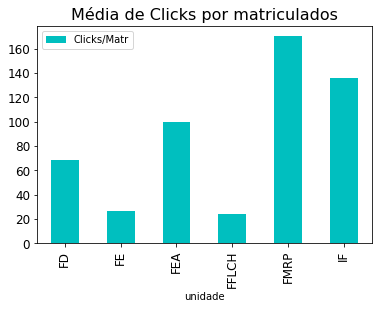

In [26]:
clicks_por_alunos.plot(kind='bar', color="c")
plt.title('Média de Clicks por matriculados', fontsize=16)
plt.tick_params(labelsize=12)
plt.show()

#**Cliques por modulos**

In [28]:
soma_mod_FD = base_FD.count()
soma_mod_FE = base_FE.count()
soma_mod_FEA = base_FEA.count()
soma_mod_FFLCH = base_FFLCH.count()
soma_mod_FMRP = base_FMRP.count()
soma_mod_IF = base_IF.count()
print(soma_mod_FD, soma_mod_FE, soma_mod_FEA, soma_mod_FFLCH, soma_mod_FMRP, soma_mod_IF )

course          17438
name            17438
cmid            17438
views           17438
uniqusers       17438
vpu             17438
students        17438
teachers        17438
vps             17403
fracstudents    17403
dtype: int64 course          4852
name            4852
cmid            4852
views           4852
uniqusers       4852
vpu             4852
students        4852
teachers        4852
vps             4849
fracstudents    4849
dtype: int64 course          26454
name            26454
cmid            26454
views           26454
uniqusers       26454
vpu             26454
students        26454
teachers        26454
vps             26444
fracstudents    26444
dtype: int64 course          33023
name            33023
cmid            33023
views           33023
uniqusers       33023
vpu             33023
students        33023
teachers        33023
vps             32875
fracstudents    32875
dtype: int64 course          31015
name            31015
cmid            31015
views       

In [29]:
base_FD.shape

(17438, 10)

In [36]:
soma_mod_FD = base_FD['name'].count() #verificado no info, leitura correta!
soma_mod_FE = base_FE['name'].count()
soma_mod_FEA = base_FEA['name'].count()
soma_mod_FFLCH = base_FFLCH['name'].count()
soma_mod_FMRP = base_FMRP['name'].count()
soma_mod_IF = base_IF['name'].count()
print(soma_mod_FD, soma_mod_FE, soma_mod_FEA, soma_mod_FFLCH, soma_mod_FMRP, soma_mod_IF )

17438 4852 26454 33023 31015 7535


In [38]:
clicks_por_mod_FD = soma_views_FD/soma_mod_FD
clicks_por_mod_FE = soma_views_FE/soma_mod_FE
clicks_por_mod_FEA = soma_views_FEA/soma_mod_FEA
clicks_por_mod_FFLCH = soma_views_FFLCH/soma_mod_FFLCH
clicks_por_mod_FMRP = soma_views_FMRP/soma_mod_FMRP
clicks_por_mod_IF = soma_views_IF/soma_mod_IF
print(clicks_por_mod_FD, clicks_por_mod_FE, clicks_por_mod_FEA, clicks_por_mod_FFLCH, clicks_por_mod_FMRP, clicks_por_mod_IF)

165.19015942195205 94.7040395713108 192.3249036062599 114.02495230596857 132.76675802031275 374.54837425348376


In [67]:
l_clicks_mod = [clicks_por_mod_FD, clicks_por_mod_FE, clicks_por_mod_FEA, clicks_por_mod_FFLCH, clicks_por_mod_FMRP, clicks_por_mod_IF]
list_clicks_mod =  {'Clicks/Modulo': l_clicks_mod}
clicks_por_mod_result = pd.DataFrame(data=list_clicks_mod)
clicks_por_mod_result

,Clicks/Modulo
0,165.190159
1,94.704040
2,192.324904
3,114.024952
4,132.766758
5,374.548374


In [69]:
clicks_por_mod = clicks_por_alunos
clicks_por_mod.rename(columns={'Clicks/Matr':'Clicks/Modulo'}, inplace = True)
clicks_por_mod['Clicks/Modulo'] = clicks_por_mod_result['Clicks/Modulo'].values
clicks_por_mod

,Clicks/Modulo
unidade,
FD,165.190159
FE,94.704040
FEA,192.324904
FFLCH,114.024952
FMRP,132.766758
IF,374.548374


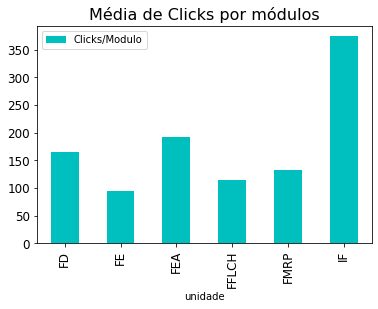

In [70]:
clicks_por_mod.plot(kind='bar', color="c")
plt.title('Média de Clicks por módulos', fontsize=16)
plt.tick_params(labelsize=12)
plt.show()